In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [54]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [56]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


In [57]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


Text(0.5, 1.0, 'Age')

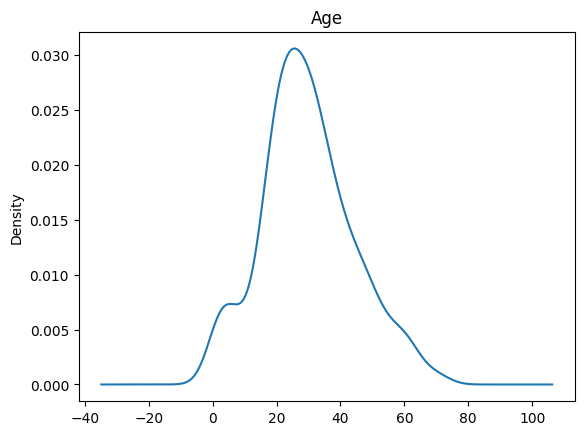

In [58]:
x_train['Age'].plot(kind='kde')
plt.title('Age')

Text(0.5, 1.0, 'Fare')

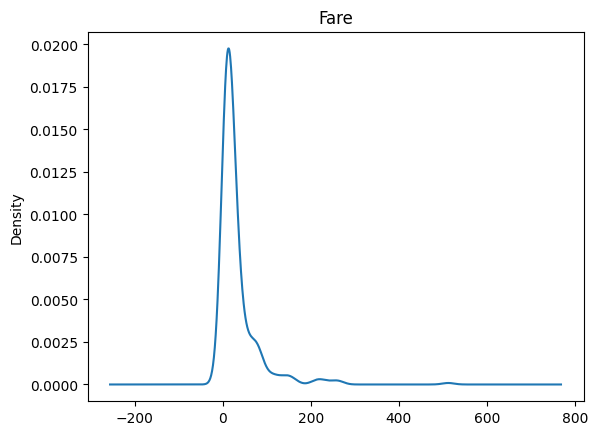

In [59]:
x_train['Fare'].plot(kind='kde')
plt.title('Fare')

By the above plots we can see that age is normally distributed but fare is right skeweed

In [60]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [62]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [63]:
x_train.isnull().mean()*100

,0
Age,20.786517
Fare,5.056180
Family,0.000000


# **IMPUTATION USING PANDAS**

In [64]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [65]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['Fare_mean'] = x_train['Fare'].fillna(median_fare)

In [66]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
821,27.0,8.6625,0,27.0,27.0,8.6625,8.6625
437,24.0,18.7500,5,24.0,24.0,18.7500,18.7500
651,18.0,23.0000,1,18.0,18.0,23.0000,23.0000
764,16.0,7.7750,0,16.0,16.0,7.7750,7.7750
658,23.0,13.0000,0,23.0,23.0,13.0000,13.0000


In [67]:
print('Original Age variable variance: ',x_train['Age'].var())
print('Age variable variance after median imputation: ',x_train['Age_median'].var())
print('Age variable variance after mean imputation: ',x_train['Age_mean'].var())

print('Original Fare variable variance: ',x_train['Fare'].var())
print('Fare variable variance after median imputation: ',x_train['Fare_median'].var())
print('Fare variable variance after mean imputation: ',x_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age variable variance after median imputation:  161.98956633460548
Age variable variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare variable variance after median imputation:  2340.09102197536
Fare variable variance after mean imputation:  2340.09102197536


variance shrink will happen but large or drastic change is not acceptable

age(20%) has greater change becaues it has more missing values than the fare(5%) column

Text(0.5, 1.0, 'Age')

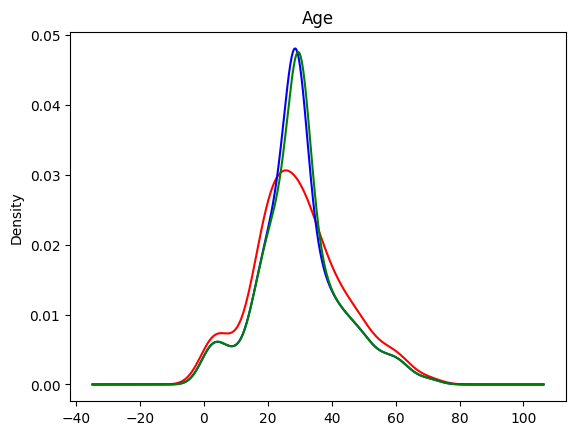

In [68]:
x_train['Age'].plot(kind='kde',color='red')
x_train['Age_median'].plot(kind='kde',color='blue')
x_train['Age_mean'].plot(kind='kde',color='green')
plt.title('Age')

see a drastic spike after imputation this is red flag or can say its not correct

Text(0.5, 1.0, 'Fare')

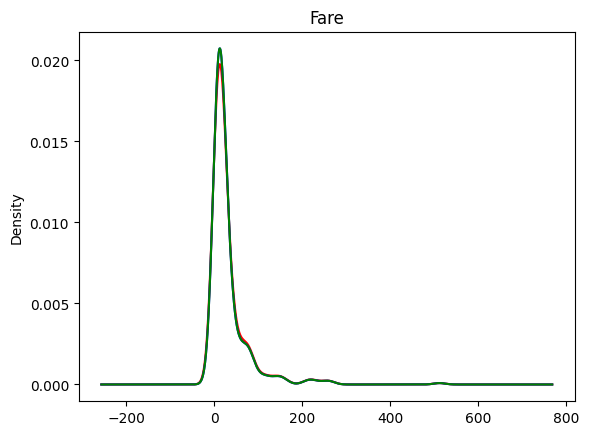

In [69]:
x_train['Fare'].plot(kind='kde',color='red')
x_train['Fare_median'].plot(kind='kde',color='blue')
x_train['Fare_mean'].plot(kind='kde',color='green')
plt.title('Fare')

Alost same after and before imputation therefore this is fine

<Axes: >

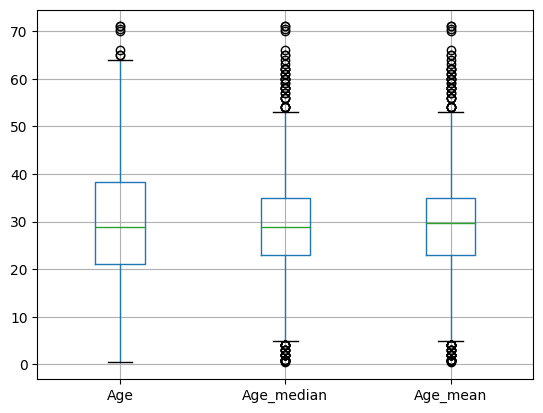

In [70]:
x_train[['Age','Age_median','Age_mean']].boxplot()
# The inter quartile range have shrinked and we have got outliers at both the ends after imputation.
# This is a red flag.

<Axes: >

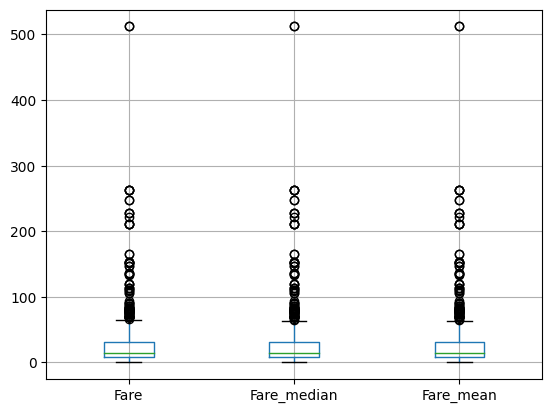

In [71]:
x_train[['Fare','Fare_median','Fare_mean']].boxplot()
# No suck difference seen here

**Conclution** -- we can use mean, median imputation for Fare column as its fine by above supports

but for Age column i would not have gone for mean, median imputation as it has shown continuously a red flag

# **IMPUTATION USING SKLEARN**

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [74]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [75]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder = 'passthrough')

In [76]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [77]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [78]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

In [81]:
x_train = pd.DataFrame(x_train,columns=x.columns)

In [83]:
x_train.sample(5)

,Age,Fare,Family
683,28.75,7.8792,0.0
17,35.00,8.0500,0.0
98,26.00,26.0000,2.0
647,28.75,14.5000,0.0
468,37.00,7.9250,2.0


In [84]:
x_train.isnull().sum()

,0
Age,0
Fare,0
Family,0
